<a href="https://colab.research.google.com/github/Nikhil-24K/GenerativeAI/blob/main/Exp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#import the libraries
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [7]:
#preprocess the image
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img,channels=3)
  img = tf.image.convert_image_dtype(img,tf.float32)
  img = img[tf.newaxis,:]
  return img

content_image = load_image('/content/images.jpeg')
style_image = load_image('/content/sketch.jpeg')

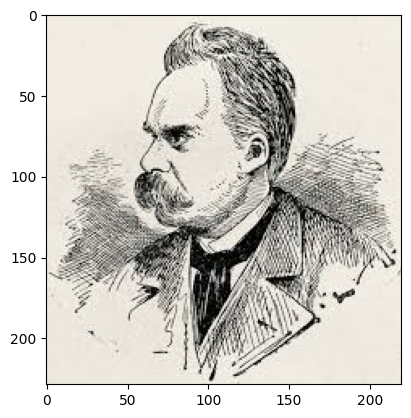

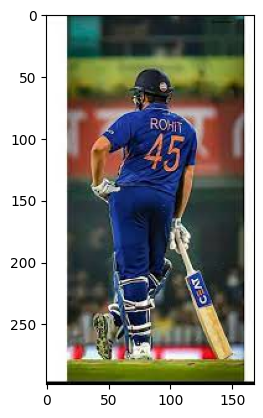

In [8]:
#visualisation of images
plt.imshow(np.squeeze(style_image))
plt.show()
plt.imshow(np.squeeze(content_image))
plt.show()

In [9]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

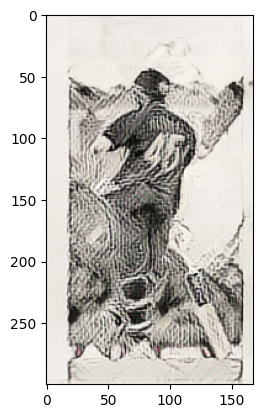

True

In [12]:
#merge the content & style images
stylized_image = model(tf.constant(content_image),tf.constant(style_image))[0]
plt.imshow(np.squeeze(stylized_image))
plt.show()
cv2.imwrite('generated_img.jpg',cv2.cvtColor(np.squeeze(stylized_image)*255,cv2.COLOR_BGR2RGB))